Turn 0
  0 1 2 3
0 2 1 2 2
1 2 3 2 2
2 2 3 2 3
3 3 2 1 2
(0, 1) (48.6, 5.6)
(0, 1) (59.8, 6.0)
(1, 2) (54.4, 6.4)
(0, 2) (60.2, 6.4)
(0, 3) (65.6, 6.4)
(0, 3)
Turn 1
  0 1 2 3
0 2 1 1 1
1 2 3 3 3
2 2 3 1 3
3 3 2 1 2
(0, 1) (48.0, 6.0)
(1, 2) (54.8, 6.0)
(1, 2) (56.0, 6.0)
(0, 0) (53.6, 6.4)
(1, 3) (69.2, 6.4)
(2, 1) (77.0, 6.6)
(2, 1)
Turn 2
  0 1 2 3
0 2 2 2 2
1 2 1 1 3
2 2 4 1 1
3 3 2 1 2
(0, 1) (55.2, 6.0)
(1, 2) (66.0, 6.2)
(2, 0) (76.4, 6.4)
(1, 0) (55.2, 6.6)
(1, 0)
Turn 3
  0 1 2 3
0 1 2 2 1
1 2 1 1 3
2 3 4 1 1
3 3 2 1 2
(0, 1) (51.8, 6.0)
(1, 2) (54.6, 6.4)
(1, 2) (54.6, 6.8)
(1, 2)
Turn 4
  0 1 2 3
0 1 1 2 1
1 2 2 2 1
2 3 4 2 3
3 3 2 2 2
(0, 1) (64.2, 6.4)
(1, 2) (66.8, 6.6)
(1, 0) (62.2, 6.8)
(1, 0)
Turn 5
  0 1 2 3
0 1 2 2 2
1 3 2 2 1
2 3 1 1 1
3 3 4 3 3
(0, 1) (45.8, 5.6)
(0, 1) (50.4, 6.2)
(1, 2) (66.2, 6.4)
(2, 3) (57.8, 6.6)
(0, 2) (59.8, 6.6)
(0, 2)
Turn 6
  0 1 2 3
0 1 1 2 3
1 3 2 3 1
2 3 1 1 1
3 3 4 3 3
(0, 1) (44.0, 5.8)
(3, 2) (55.4, 6.2)
(0, 0) (68.8, 6.2)
(2, 1) (

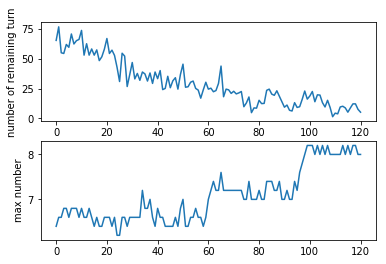

In [6]:
# coding: utf-8

# In[5]:

import random
import numpy as np
import Board
import Game
import copy
import matplotlib.pyplot as plt


# In[6]:

class Player(object):
    """雛形"""

    def __init__(self):
        pass

    def next_cell(self, board):
        pass


# In[7]:

class Random(object):
    """Randomに選ぶAIのクラス"""

    def __init__(self):
        pass

    def next_cell(self, board):
        """boardを受け取り、次に選択するcellの座標をタプルで返す"""
        return random.choice(board.selectable_list())


# In[8]:

class Human(object):
    """手動対戦のクラス"""

    def __init__(self):
        pass

    def next_cell(self, board):
        """boardを受け取り、次に選択するcellの座標をタプルで返す。入力は3, 4のようにタプルで。おけるようになるまでやりなおさせる。ゲームをやめる場合"C"を入力しFalseを返す"""
        while True:
            a = input(u"座標を入力してください。(例)3, 4。Cを入力すると中断します。")
            if a == "C":  # Cが入力されたら中断
                return False

            l = a.split(',')
            try:
                x = int(l[0])
                y = int(l[1])
                if (x, y) in board.selectable_list():
                    return x, y

                else:
                    print(u"選べる座標を選んでください。選べる座標は", board.selectable_list(), u"です")
            except ValueError:
                print(u"正しい座標を入力してください")


# In[9]:

class Monte_Carlo(object):
    def __init__(self, repeat=5):
        """repeatの数だけランダム試行を行う
            self.eval_list : list
                プレイ時のそれぞれの局面での評価値(a, ma){a: 最大の数字,ma：ゲーム終了までのターン数}
        """
        self.repeat = repeat
        self.eval_list = []
        self.game_num = 0

    def next_cell(self, board):
        """モンテカルロ法の評価値が一番高かった手を返す。"""
        # 評価用に新しいBoardをつくる
        board_eval = Board.Board()
        board_eval.board = copy.deepcopy(board.board)
        # board_evalを使って実験をする
        ma = (-1, -1)
        best_cell = (10, 10)
        for a in board.selectable_list():  # それぞれの選択肢において
            eva = self.monte_eval(a, board_eval)  # その選択肢の評価値
            eva_turn = eva[0]  # ターン数の評価値
            eva_max = eva[1]  # 最大値の評価値

            if eva[1] > ma[1]:  # 最大の数字が過去最高の時
                ma = eva
                best_cell = a
                print(a, ma)
            elif eva[1] == ma[1]:  # 最大の数字が同列一位の時はターン数が多い方を優先
                if eva[0] > ma[0]:
                    ma = eva
                    best_cell = a
                    print(a, ma)
            else:
                pass

        self.eval_list.append(ma)
        return best_cell

    def monte_eval(self, cell, current_board):
        """cellのマスの評価値を算出する。(ターン数の合計,最大値の合計)を返す"""
        result_max = []  # 最大値のリスト
        result_turn = []  # ターン数のリスト
        for i in range(self.repeat):  # 毎回インスタンスを生成しないといけない？タプルにすれば大丈夫？
            new_board = Board.Board()
            new_board.board = copy.deepcopy(current_board.board)
            new_board.select_cell(cell)
            result = (Game.Game(Random()).play(board=new_board, result=False))  # 実際にプレイをする
            result_max.append(result[2])
            result_turn.append(result[1])
            self.game_num += 1  # 合計で何ゲームプレイしたのかを記録しておく
        return float(sum(result_turn)) / len(result_turn), float(sum(result_max)) / len(result_max)



